<a href="https://colab.research.google.com/github/hopedom/DS5/blob/main/day1_%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4_%EB%B6%84%EB%A5%98%EA%B8%B0%EB%A5%BC_%EB%A7%8C%EB%93%A4%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트 : 가위바위보 분류기를 만들자

# 모델 학습 (노드 진행)

데이터를 준비하자
___

🔶 데이터 만들기


(1) 우리는 노트북 전면 카메라를 활용하여 가위, 바위, 보 이미지 각 100장을 만들어 볼거예요. 그런데 300장을 어느 세월에 만들까요?

걱정하지 마세요. 구글의 teachable machine 사이트에서 쉽게 데이터를 만들어볼 수 있습니다.

아래 사이트에서 Get Started 버튼을 눌러보세요.

그 다음, Image Project - Standard image model을 선택하면, Webcam을 구동해 클래스별 이미지 데이터를 직접 촬영해서 만들 수 있는 멋진 화면이 나타납니다.

https://teachablemachine.withgoogle.com/


(2) 먼저 가위 이미지 데이터를 만들어 봅시다.

웹캠 앞에 가위 포즈를 취하면서 <Hold to Record> 버튼을 누르면 이미지가 캡쳐됩니다.

딥러닝 모델이 인식하기 좋게끔 여러분들 손이 잘 보이게 찍어주세요.

여러 각도에서 찍어보세요.

여러 크기로 찍어보세요.

혼자하면 다양한 각도와 크기를 저장할 수 없으니, 옆 동료와 함께 하세요.

좋은 데이터가 좋은 결과를 낳는다는 것을 꼭 기억하세요.

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.19.0
2.0.2


In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
def resize_images(img_path):
        images=glob.glob(img_path + "/*.jpg")

        print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
        target_size=(28,28)
        for img in images:
                old_img=Image.open(img)
                new_img=old_img.resize(target_size, Image.Resampling.LANCZOS)
                new_img.save(img, "JPEG")

        print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path1 = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보/scissor"
resize_images(image_dir_path1)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path2 = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보/rock"
resize_images(image_dir_path2)
print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path3 = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보/paper"
resize_images(image_dir_path3)
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


예시 코드


(6) 숫자 손글씨 인식기는 mnist.load_data() 라는 함수로 데이터를 읽었던 것 기억하시죠? 여러분들이 아직 코딩에 익숙하지 않을 수 있으므로, 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수를 만들어 드릴 거예요. 이 코드를 활용하면 임의의 사진 데이터(ex. 귤이 잘 익었나, 안 익었나? 웃는 얼굴인가, 우는 얼굴인가, 평범한 표정의 얼굴인가? 등)에 적용하실 수 있을 겁니다.

load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받습니다. 여기서는 rock_scissor_paper 폴더 위치를 적어주면 됩니다. 숫자 손글씨는 0~9 까지의 클래스가 있었던 것 기억하시죠? 가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링이 될 것입니다.

In [4]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3

    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


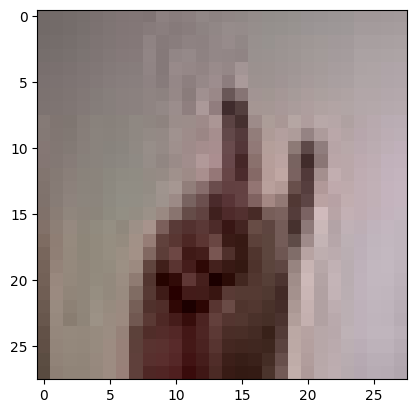

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

딥러닝 네트워크 설계하기
___
자 이제 데이터의 준비가 끝났습니다. 이제 여러분들이 가위바위보를 인식하는 딥러닝 네트워크를 설계해 볼까요?

In [6]:
# 모델 정의
import tensorflow as tf
from tensorflow import keras
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

# (1) input_shape의 3번째 값이 1 --> 3
# (2) 마지막 Dense의 출력값이 10 --> 3

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,819 (120.39 KB)

 Trainable params: 30,819 (120.39 KB)

 Non-trainable params: 0 (0.00 B)

딥러닝 네트워크 학습시키기
___

잘 설계가 되었다면, 이제 학습을 시켜봅시다. 아마도 여러분들의 데이터는 거의 비슷비슷할 것이기 때문에 accuracy가 꽤 높게 나올 것입니다.

In [7]:
# 모델 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5155 - loss: 1.0736
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5330 - loss: 0.9993
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5667 - loss: 0.8900
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6942 - loss: 0.7424
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8429 - loss: 0.6257
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9238 - loss: 0.4722
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8613 - loss: 0.3937
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9605 - loss: 0.2886
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9740 - loss: 0.2239
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9953 - loss: 0.1665


얼마나 잘 만들었는지 확인하기(테스트)
___

여러분들은 300장의 가위바위보 이미지를 만들어 모두 학습에 사용했습니다.
그러므로 테스트 데이터가 없죠. 옆 친구의 이미지 데이터 300장을 받아오세요. 그리고 그것을 테스트 데이터로 하여 test accuracy를 측정해보세요. (만약 웹캠이 없는 경우 섹션을 진행하신 경우, 이미 test 데이터셋이 준비돼있으니 친구에게 조르지 않으셔도 됩니다)

In [8]:
# 전처리: 리사이징
image_dir_path = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보_소민/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보_소민/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보_소민/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [9]:
# 데이터 불러오기
image_dir_path = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보_소민/"

(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [10]:
# 분류 결과
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9241 - loss: 0.2102
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9781 - loss: 0.1296
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9956 - loss: 0.0859
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0739
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0640
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0475
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0454
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0315
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0286
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0233
10/10 - 0s - 24ms/step - accuracy: 0.3333 - loss: 9.1988
test_loss: 9.198786735534668 
test_accuracy: 0.3333333432674408


## 시도1. 모델 파라미터 수정
___
- 필터 숫자와 epoch 횟수를 수정한 다음 학습을 진행하였습니다.
  - n_channel_1 : 16 -> 32
  - n_channel_2 : 32 -> 64
  - n_dense : 32 -> 64
  - n_train_epoch : 10 -> 30

In [11]:
# 모델 정의
n_channel_1=32  #  16 -> 32
n_channel_2=64 # 32 -> 64
n_dense=64       # 32 -> 64
n_train_epoch=30 # 10 -> 30

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,051 (476.76 KB)

 Trainable params: 122,051 (476.76 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 모델 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4033 - loss: 1.0646
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6500 - loss: 0.8775
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6981 - loss: 0.7137
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7353 - loss: 0.5833
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8709 - loss: 0.3979
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9761 - loss: 0.1943
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9978 - loss: 0.1072
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0648
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0356
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0213
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 1.0000 - loss: 0.0171
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy:

In [13]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - 27ms/step - accuracy: 0.3333 - loss: 14.8675
test_loss: 14.867512702941895 
test_accuracy: 0.3333333432674408


첫번째 시도 (그대로)
___
- `accuracy`: 0.3333
- `loss`: 5.1017

두번째 시도 (파라미터 값 2배수 조정)
___
- `accuracy`: 0.3333
- `loss`: 12.7561


## 시도2. 학습 데이터 수정
___
- 제 데이터가 학습에 적합하지 않는 것으로 보여서 데이터를 모두 합친다음, 30% 만 검증 데이터로 활용하였습니다.
- 파라미터의 경우, epoch만 그대로 10으로 변경하였습니다.

In [14]:
# train/test split
from sklearn.model_selection import train_test_split

image_dir_path_user1 = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보/"
x_user1, y_user1 = load_data(image_dir_path_user1)

image_dir_path_user2 = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보_소민/"
x_user2, y_user2 = load_data(image_dir_path_user2)

x_combined = np.concatenate((x_user1, x_user2), axis=0)
y_combined = np.concatenate((y_user1, y_user2), axis=0)

x_combined_norm = x_combined / 255.0

x_train_combined, x_test_combined, y_train_combined, y_test_combined = train_test_split(
    x_combined_norm, y_combined, test_size=0.3, random_state=42, stratify=y_combined
)

print("Training data shape:", x_train_combined.shape)
print("Testing data shape:", x_test_combined.shape)

학습데이터(x_train)의 이미지 개수는 300 입니다.
학습데이터(x_train)의 이미지 개수는 300 입니다.
Training data shape: (420, 28, 28, 3)
Testing data shape: (180, 28, 28, 3)


In [15]:
# 모델 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_combined, y_train_combined, epochs=n_train_epoch)

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5392 - loss: 4.4099
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5371 - loss: 0.9496
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6209 - loss: 0.7611
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7045 - loss: 0.6457
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7529 - loss: 0.5615
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7620 - loss: 0.5198
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7647 - loss: 0.5354
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8166 - loss: 0.4480
Epoch 9/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8362 - loss: 0.4217
Epoch 10/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.8504 - loss: 0.3549
Epoch 11/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.8758 - loss: 0.3329
Epoch 12/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy:

In [16]:
# 분류 결과 x_combined_norm, y_combined
test_loss, test_accuracy = model.evaluate(x_test_combined, y_test_combined, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

6/6 - 0s - 40ms/step - accuracy: 0.9056 - loss: 0.1521
test_loss: 0.1521243155002594 
test_accuracy: 0.9055555462837219


분류 정확도가 흡족스럽게 나왔습니다!

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
예측확률분포: [9.0670828e-06 9.9993986e-01 5.1022318e-05]
라벨: 0, 예측결과: 1


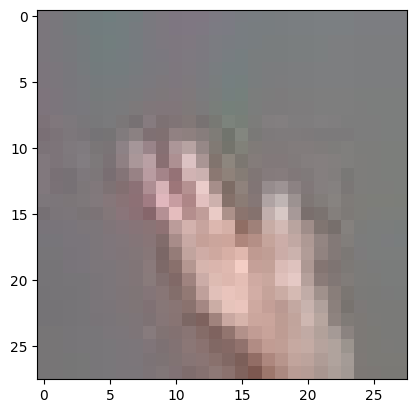

예측확률분포: [9.9046016e-01 6.2417566e-05 9.4772829e-03]
라벨: 1, 예측결과: 0


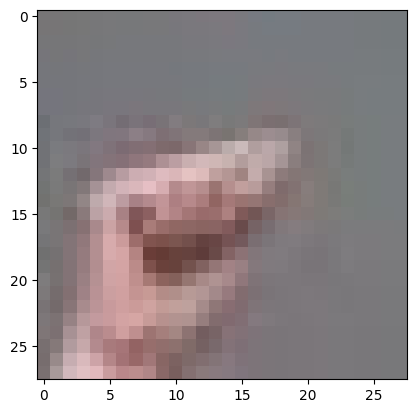

예측확률분포: [0.5449653  0.04766909 0.40736556]
라벨: 1, 예측결과: 0


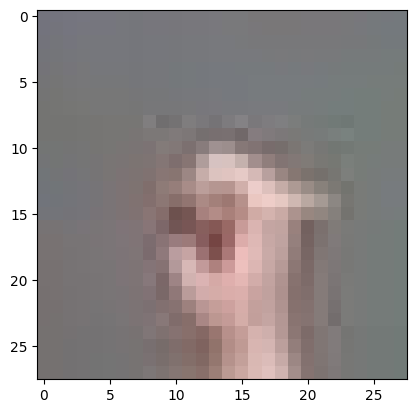

예측확률분포: [0.01340232 0.9815047  0.00509306]
라벨: 0, 예측결과: 1


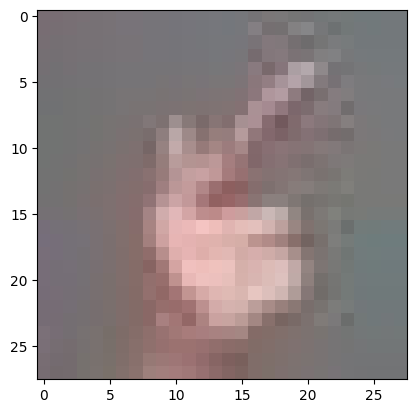

예측확률분포: [6.9402591e-03 6.9301296e-07 9.9305898e-01]
라벨: 0, 예측결과: 2


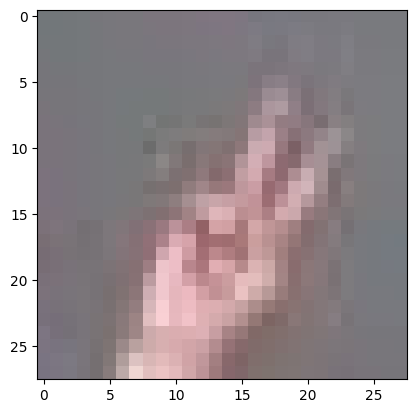

In [17]:
# 틀린 이미지 확인
predicted_result = model.predict(x_test_combined)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)

import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

리사이징된 이미지가 많이 뭉개진 것으로 확인되었습니다.

그래서 원래 사이즈의 데이터를 다시 불러와서 학습을 진행해봤습니다.

# 모델 학습 (리사이징 생략)

In [18]:
def load_raw_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    imgs = []
    labels = []

    idx = 0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs.append(img)
        labels.append(0)   # 가위 : 0
        idx = idx + 1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs.append(img)
        labels.append(1)   # 바위 : 1
        idx = idx + 1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs.append(img)
        labels.append(2)   # 보 : 2
        idx = idx + 1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return np.array(imgs), np.array(labels)

In [19]:
image_dir_path_user1_raw = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보(raw)/환철"

x_train_raw, y_train_raw = load_raw_data(image_dir_path_user1_raw)
x_train_raw_norm = x_train_raw/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train_raw shape: {}".format(x_train_raw.shape))
print("y_train_raw shape: {}".format(y_train_raw.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train_raw shape: (300, 224, 224, 3)
y_train_raw shape: (300,)


In [20]:
image_dir_path_user2_raw = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보(raw)/소민"

x_test_user2_raw, y_test_user2_raw = load_raw_data(image_dir_path_user2_raw)
x_test_user2_raw_norm = x_test_user2_raw/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test_user2_raw shape: {}".format(x_test_user2_raw.shape))
print("y_test_user2_raw shape: {}".format(y_test_user2_raw.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test_user2_raw shape: (300, 224, 224, 3)
y_test_user2_raw shape: (300,)


In [21]:
image_dir_path_user3_raw = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보(raw)/승우"

(x_test_user3_raw, y_test_user3_raw)=load_raw_data(image_dir_path_user3_raw)
x_test_user3_raw_norm = x_test_user3_raw/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test_user3_raw shape: {}".format(x_test_user3_raw.shape))
print("y_test_user3_raw shape: {}".format(y_test_user3_raw.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test_user3_raw shape: (300, 224, 224, 3)
y_test_user3_raw shape: (300,)


In [22]:
# 모델 정의
n_channel_1=32
n_channel_2=64
n_dense=64

model_raw=keras.models.Sequential()
model_raw.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(224,224,3)))
model_raw.add(keras.layers.MaxPool2D(2,2))
model_raw.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model_raw.add(keras.layers.MaxPooling2D((2,2)))
model_raw.add(keras.layers.Flatten())
model_raw.add(keras.layers.Dense(n_dense, activation='relu'))
model_raw.add(keras.layers.Dense(3, activation='softmax'))

model_raw.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │    11,944,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,963,587 (45.64 MB)

 Trainable params: 11,963,587 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# 모델 학습
model_raw.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model_raw.fit(x_train_raw_norm, y_train_raw, epochs=10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.3172 - loss: 4.3529
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7527 - loss: 0.8020
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9544 - loss: 0.2163
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9991 - loss: 0.0332
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 1.0000 - loss: 0.0080
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 1.0000 - loss: 0.0015
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 1.0000 - loss: 8.3842e-04
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 1.0000 - loss: 3.7553e-04
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 1.0000 - loss: 3.1056e-04
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - loss: 2.3967e-04


In [24]:
# 분류 결과 (소민님 이미지)
test_loss, test_accuracy = model_raw.evaluate(x_test_user2_raw_norm, y_test_user2_raw, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 6s - 567ms/step - accuracy: 0.3333 - loss: 9.9700
test_loss: 9.970046997070312 
test_accuracy: 0.3333333432674408


In [25]:
# 분류 결과 (승우님 이미지)
test_loss, test_accuracy = model_raw.evaluate(x_test_user3_raw_norm, y_test_user3_raw, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 7s - 735ms/step - accuracy: 0.4367 - loss: 4.0609
test_loss: 4.060888290405273 
test_accuracy: 0.43666666746139526


제 이미지가 학습에 적합하지 않은 것이 확실합니다.

이전처럼 세명의 사진을 합친 다음 train, test으로 나눈 후 학습 진행해보겠습니다

## 학습 데이터 수정 후
___
- 이전처럼 세명의 데이터를 모두 합친 다음, 30% 만 검증 데이터로 활용하였습니다

In [26]:
# train/test split
from sklearn.model_selection import train_test_split

x_combined_raw = np.concatenate((x_train_raw, x_test_user2_raw, x_test_user3_raw), axis=0)
y_combined_raw = np.concatenate((y_train_raw, y_test_user2_raw, y_test_user3_raw), axis=0)

x_combined_raw_norm = x_combined_raw / 255.0

x_train_combined_raw, x_test_combined_raw, y_train_combined_raw, y_test_combined_raw = train_test_split(
    x_combined_raw_norm, y_combined_raw, test_size=0.3, random_state=42, stratify=y_combined_raw
)

print("Training data shape:", x_train_combined_raw.shape)
print("Testing data shape:", x_test_combined_raw.shape)

Training data shape: (630, 224, 224, 3)
Testing data shape: (270, 224, 224, 3)


In [27]:
model_raw.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model_raw.fit(x_train_combined_raw, y_train_combined_raw, epochs=10) # Changed to use combined training data

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.6210 - loss: 2.0960
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7873 - loss: 0.5606
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.8437 - loss: 0.3728
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9017 - loss: 0.2843
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9519 - loss: 0.1717
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9720 - loss: 0.0976
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9878 - loss: 0.0467
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9923 - loss: 0.0338
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.9988 - loss: 0.0186
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9998 - loss: 0.0244


In [28]:
# 분류 결과
test_loss, test_accuracy = model_raw.evaluate(x_test_combined_raw, y_test_combined_raw, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

9/9 - 5s - 569ms/step - accuracy: 0.9741 - loss: 0.0600
test_loss: 0.060002099722623825 
test_accuracy: 0.9740740656852722


학습 데이터 수정 후 분류 결과입니다.

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 550ms/step
예측확률분포: [9.7417569e-01 2.2550187e-06 2.5822060e-02]
라벨: 1, 예측결과: 0


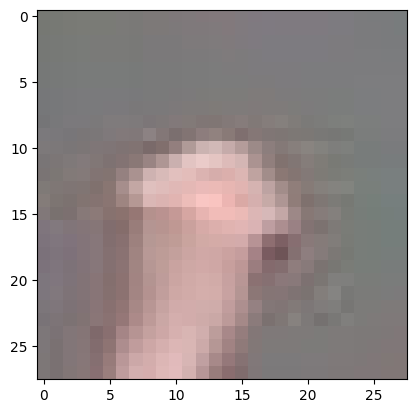

예측확률분포: [1.2202715e-05 1.3293872e-05 9.9997443e-01]
라벨: 1, 예측결과: 2


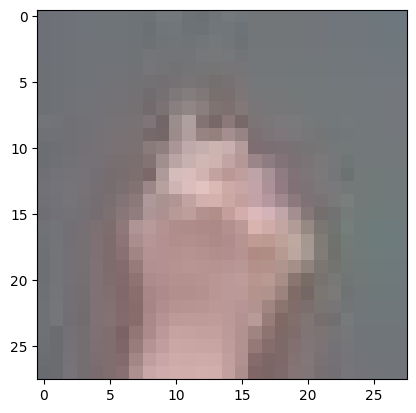

예측확률분포: [2.2257683e-03 2.4122473e-04 9.9753296e-01]
라벨: 1, 예측결과: 2


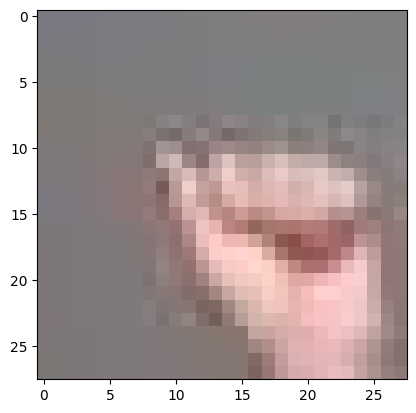

예측확률분포: [2.4387198e-04 5.6000386e-05 9.9970019e-01]
라벨: 1, 예측결과: 2


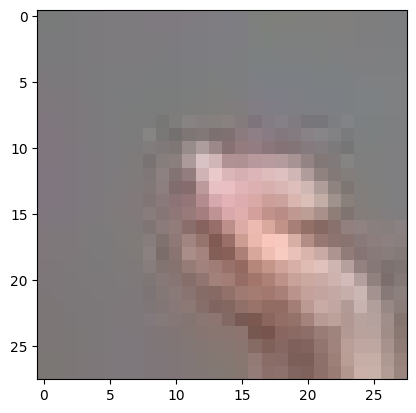

예측확률분포: [7.3313377e-06 8.3665640e-07 9.9999171e-01]
라벨: 0, 예측결과: 2


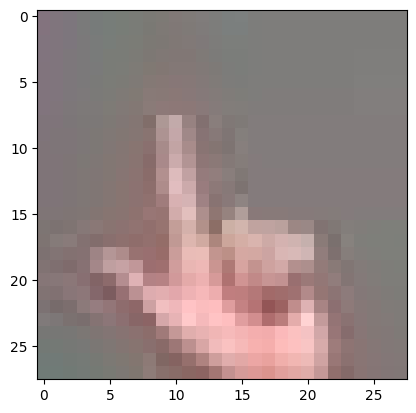

In [29]:
# 틀린 이미지 확인
predicted_result = model_raw.predict(x_test_combined_raw)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)

import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

총평.
- 동료의 이미지를 활용해 이미지 분류 실습을 진행하였습니다.
- training 성능은 역시 의미가 없었습니다. test 성능이 중요하겠습니다.
- tensorflow를 활용한 코드와 친해지려면 시간을 꽤 투자해야할 것 같습니다.

## 추가. 순호님 이미지 분류 결과 확인
___

In [30]:
# 원래 이미지 크기로 학습
image_dir_path_user4_raw = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보(raw)/순호"

x_test_user4_raw, y_test_user4_raw =load_raw_data(image_dir_path_user4_raw)
x_test_user4_raw_norm = x_test_user4_raw/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test_user4_raw shape: {}".format(x_test_user4_raw.shape))
print("y_test_user4_raw shape: {}".format(y_test_user4_raw.shape))

학습데이터(x_train)의 이미지 개수는 304 입니다.
x_test_user4_raw shape: (304, 224, 224, 3)
y_test_user4_raw shape: (304,)


In [31]:
# 분류 결과
test_loss, test_accuracy = model_raw.evaluate(x_test_user4_raw_norm, y_test_user4_raw, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 6s - 597ms/step - accuracy: 0.4770 - loss: 2.3633
test_loss: 2.36330509185791 
test_accuracy: 0.47697368264198303


음.. 재미있네요.. 순호님 원래 이미지를 확인해보니 배경이 깨끗하지 않아서 그런지 분류가 더 잘안되진 않았을까 생각해봅니다.

In [32]:
# 전처리: 리사이징
image_dir_path = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보_순호/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보_순호/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보_순호/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [33]:
image_dir_path_user4 = "/content/drive/MyDrive/DS/7.딥러닝/data/가위바위보_순호"

x_test_user4, y_test_user4 =load_data(image_dir_path_user4)
x_test_user4_norm = x_test_user4/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test_user4 shape: {}".format(x_test_user4.shape))
print("y_test_user4 shape: {}".format(y_test_user4.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test_user4 shape: (300, 28, 28, 3)
y_test_user4 shape: (300,)


이미지 300개로 맞춘 후 재 진행

In [34]:
x_test_user4, y_test_user4 =load_data(image_dir_path_user4)
x_test_user4_norm = x_test_user4/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test_user4 shape: {}".format(x_test_user4.shape))
print("y_test_user4 shape: {}".format(y_test_user4.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test_user4 shape: (300, 28, 28, 3)
y_test_user4 shape: (300,)


In [35]:
# 분류 결과
test_loss, test_accuracy = model.evaluate(x_test_user4_norm, y_test_user4, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - 11ms/step - accuracy: 0.5567 - loss: 1.5595
test_loss: 1.5595297813415527 
test_accuracy: 0.5566666722297668


- 리사이징된 이미지의 모델 정확도는 `0.5566`
- 원래 이미지의 모델 정확도는 `0.3355`